In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\surim\Canada_per_capita_income.csv")

In [6]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (47, 2)


In [7]:
print("\nData types and summary statistics:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    47 non-null     int64  
 1   income  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes

Data types and summary statistics:
 None


In [8]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
               year        income
count    47.000000     47.000000
mean   1993.000000  18920.137063
std      13.711309  12034.679438
min    1970.000000   3399.299037
25%    1981.500000   9526.914515
50%    1993.000000  16426.725480
75%    2004.500000  27458.601420
max    2016.000000  42676.468370


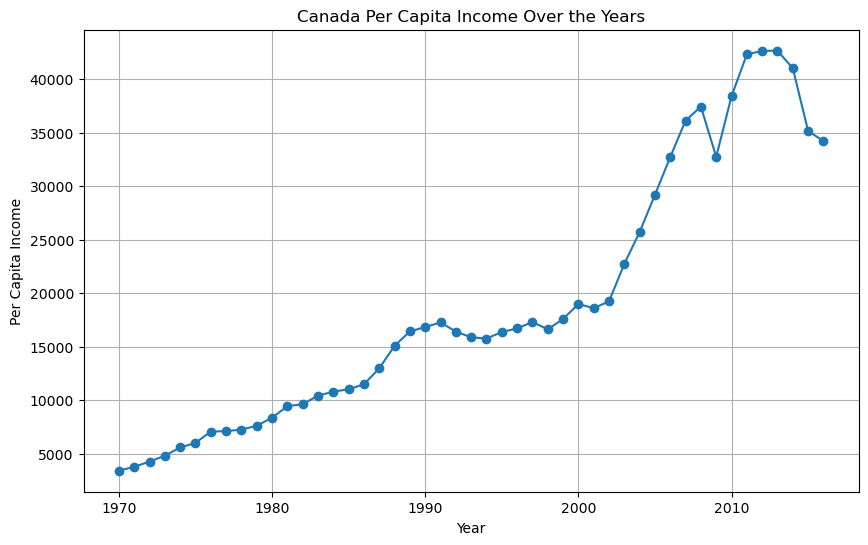

In [9]:
# Data Visualization
plt.figure(figsize=(10, 6))
plt.plot(df["year"], df["income"], marker='o')
plt.title("Canada Per Capita Income Over the Years")
plt.xlabel("Year")
plt.ylabel("Per Capita Income")
plt.grid(True)
plt.show()

In [10]:
# Feature and Target Variables
X = df[["year"]]
y = df["income"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Perform Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Perform Polynomial Regression
degree = 3  # Adjust the polynomial degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [12]:
# Evaluate Linear Regression
y_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# Evaluate Polynomial Regression
y_pred_poly = poly_model.predict(X_poly_test)
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

print("\nLinear Regression Evaluation:")
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)

print("\nPolynomial Regression Evaluation:")
print("Mean Squared Error:", poly_mse)
print("R-squared:", poly_r2)


Linear Regression Evaluation:
Mean Squared Error: 15147815.5477862
R-squared: 0.8751771396846304

Polynomial Regression Evaluation:
Mean Squared Error: 6108680.606227423
R-squared: 0.9496625118244346


In [13]:
# Cross-validation for Linear Regression
linear_scores = cross_val_score(linear_model, X, y, scoring='neg_mean_squared_error', cv=5)
linear_rmse_scores = np.sqrt(-linear_scores)

print("\nCross-Validation for Linear Regression:")
print("RMSE scores:", linear_rmse_scores)
print("Mean RMSE:", linear_rmse_scores.mean())
print("Standard Deviation:", linear_rmse_scores.std())

# Cross-validation for Polynomial Regression
poly_scores = cross_val_score(poly_model, X_poly_train, y_train, scoring='neg_mean_squared_error', cv=5)
poly_rmse_scores = np.sqrt(-poly_scores)

print("\nCross-Validation for Polynomial Regression:")
print("RMSE scores:", poly_rmse_scores)
print("Mean RMSE:", poly_rmse_scores.mean())
print("Standard Deviation:", poly_rmse_scores.std())


Cross-Validation for Linear Regression:
RMSE scores: [5683.87053182  883.08261298 4517.91260028 5654.02235474 9612.63270767]
Mean RMSE: 5270.304161497783
Standard Deviation: 2792.4147247363776

Cross-Validation for Polynomial Regression:
RMSE scores: [2277.84614095 4613.39838017 3360.96189344 2792.77932919 5254.09460102]
Mean RMSE: 3659.8160689541664
Standard Deviation: 1113.7280341536173


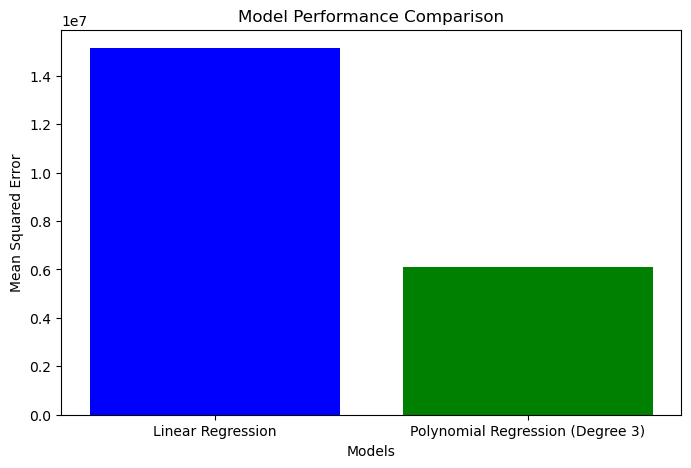

In [14]:
plt.figure(figsize=(8, 5))

mse_values = [linear_mse, poly_mse]
models = ['Linear Regression', f'Polynomial Regression (Degree {degree})']

plt.bar(models, mse_values, color=['blue', 'green'])
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.show()

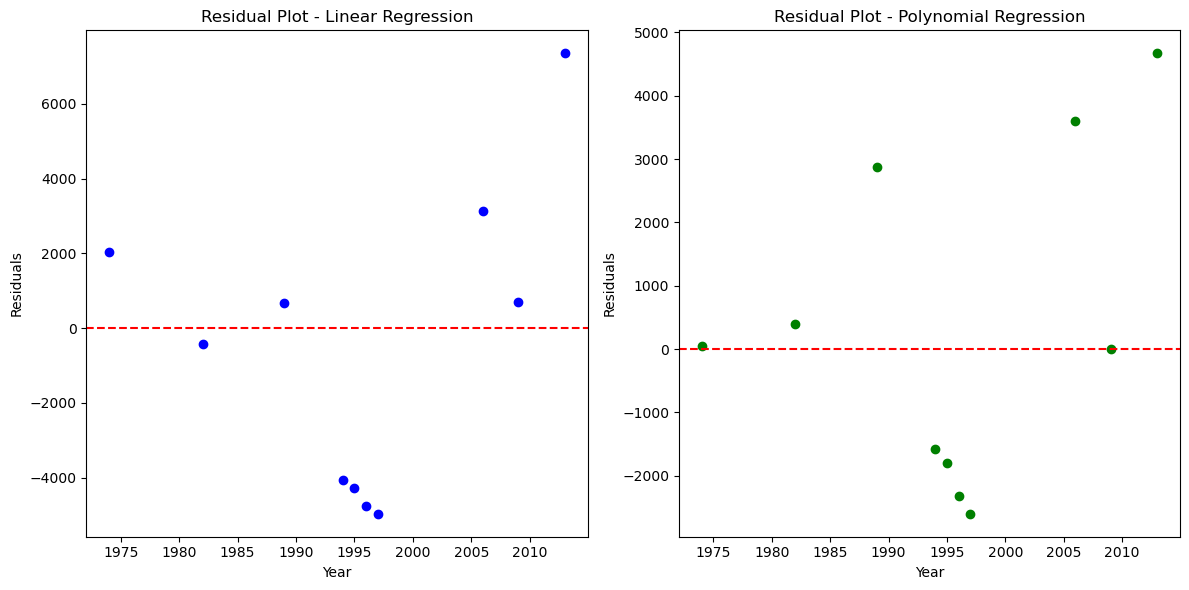

In [16]:
plt.figure(figsize=(12, 6))

# Residual plot for Linear Regression
plt.subplot(1, 2, 1)
residuals_linear = y_test - y_pred_linear
plt.scatter(X_test, residuals_linear, color='blue')
plt.axhline(y=0, color='red', linestyle='dashed')
plt.title("Residual Plot - Linear Regression")
plt.xlabel("Year")
plt.ylabel("Residuals")

# Residual plot for Polynomial Regression
plt.subplot(1, 2, 2)
residuals_poly = y_test - y_pred_poly
plt.scatter(X_test, residuals_poly, color='green')
plt.axhline(y=0, color='red', linestyle='dashed')
plt.title("Residual Plot - Polynomial Regression")
plt.xlabel("Year")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

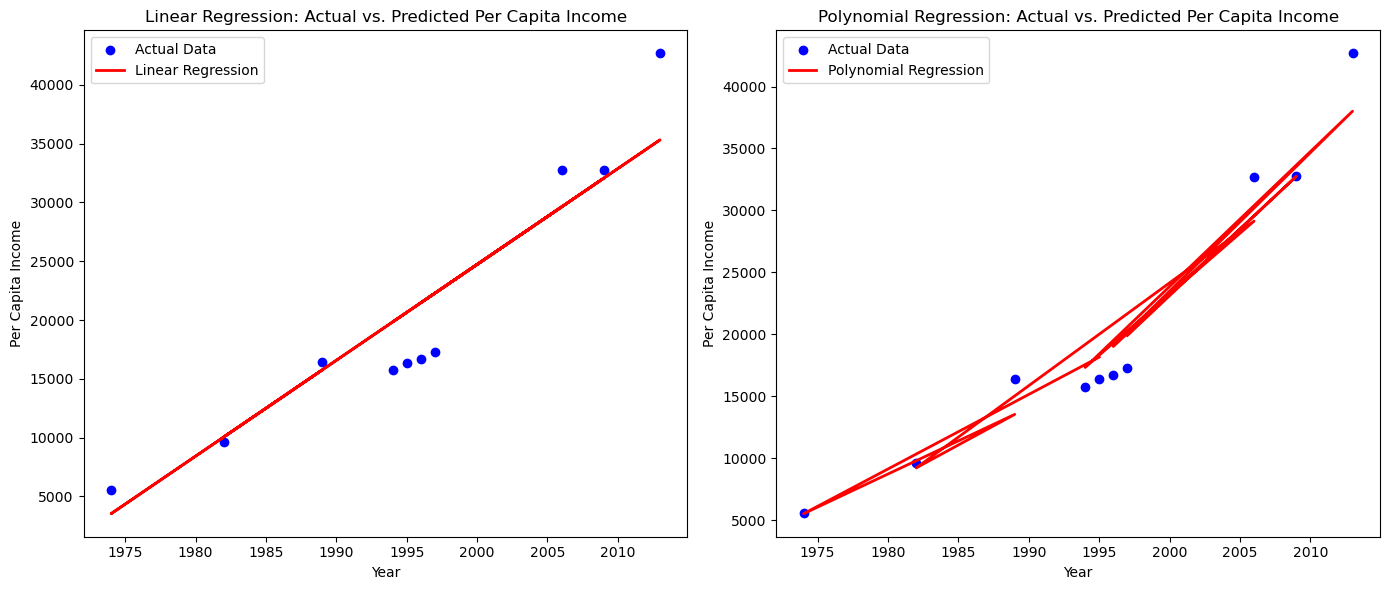

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Visualize Model Predictions (Linear Regression)
axes[0].scatter(X_test, y_test, color='blue', label='Actual Data')
axes[0].plot(X_test, y_pred_linear, color='red', linewidth=2, label='Linear Regression')
axes[0].set_title("Linear Regression: Actual vs. Predicted Per Capita Income")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Per Capita Income")
axes[0].legend()

# Visualize Model Predictions (Polynomial Regression)
axes[1].scatter(X_test, y_test, color='blue', label='Actual Data')
axes[1].plot(X_test, y_pred_poly, color='red', linewidth=2, label='Polynomial Regression')
axes[1].set_title("Polynomial Regression: Actual vs. Predicted Per Capita Income")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Per Capita Income")
axes[1].legend()

plt.tight_layout()
plt.show()

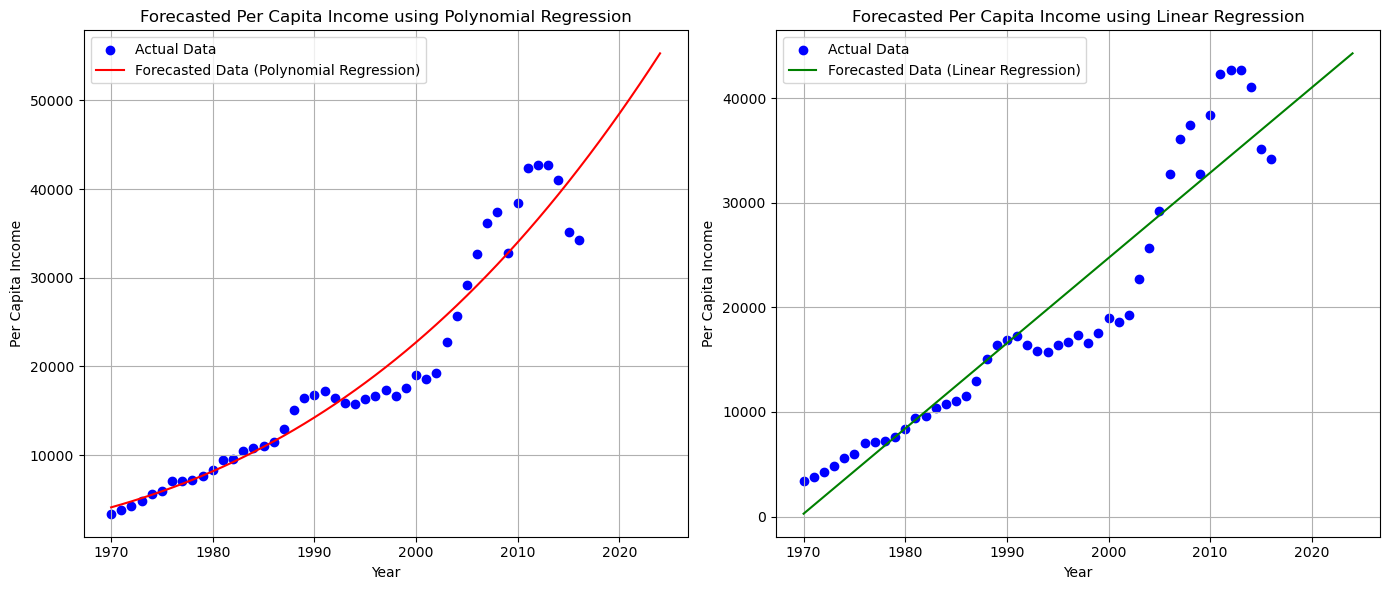

In [18]:
# Future Predictions (Polynomial Regression)
future_years = np.arange(1970, 2025).reshape(-1, 1)
future_years_poly = poly_features.transform(future_years)

future_predictions_poly = poly_model.predict(future_years_poly)

# Plot the forecasted values for future years (Polynomial Regression)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df["year"], df["income"], color='blue', label='Actual Data')
plt.plot(future_years, future_predictions_poly, color='red', label='Forecasted Data (Polynomial Regression)')
plt.title("Forecasted Per Capita Income using Polynomial Regression")
plt.xlabel("Year")
plt.ylabel("Per Capita Income")
plt.legend()
plt.grid(True)

# Future Predictions (Linear Regression)
future_predictions_linear = linear_model.predict(future_years)

plt.subplot(1, 2, 2)
plt.scatter(df["year"], df["income"], color='blue', label='Actual Data')
plt.plot(future_years, future_predictions_linear, color='green', label='Forecasted Data (Linear Regression)')
plt.title("Forecasted Per Capita Income using Linear Regression")
plt.xlabel("Year")
plt.ylabel("Per Capita Income")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
# Future Predictions (Polynomial Regression)
future_years = np.array([2022, 2023, 2024]).reshape(-1, 1)
future_years_poly = poly_features.transform(future_years)

future_predictions_poly = poly_model.predict(future_years_poly)

print("\nFuture Predictions (Polynomial Regression - Degree", degree, "):")
future_predictions_df = pd.DataFrame({'year': future_years.flatten(), 'income': future_predictions_poly})
print(future_predictions_df)

# Future Predictions (Linear Regression)
future_predictions_linear = linear_model.predict(future_years)

print("\nFuture Predictions (Linear Regression):")
future_predictions_df_linear = pd.DataFrame({'year': future_years.flatten(), 'income': future_predictions_linear})
print(future_predictions_df_linear)


Future Predictions (Polynomial Regression - Degree 3 ):
   year        income
0  2022  51839.293283
1  2023  53555.907059
2  2024  55309.974295

Future Predictions (Linear Regression):
   year        income
0  2022  42657.962508
1  2023  43473.105021
2  2024  44288.247534
